When you have a series (data points) you can fit a polynomial to: <br>
1. Smoothen the data <br>
2. Predict an approx. future value based on the fit <br>
3. Impute missing values in the data

In [1]:
import numpy as np

**Read data**

In [2]:
arr = np.genfromtxt('Datasets/apple_stock_price.csv', delimiter=',', skip_header=1)
arr

array([[127.489998, 128.880005, 126.919998, 127.830002],
       [127.629997, 128.779999, 127.449997, 128.720001],
       [128.479996, 129.029999, 128.330002, 128.449997],
       ...,
       [133.470001, 135.089996, 133.25    , 135.020004],
       [135.520004, 136.270004, 134.619995, 135.509995],
       [135.669998, 135.899994, 134.839996, 135.350006]])

In [3]:
a = arr[:, 3]

**Fitting a cubic polynomial** <br>
Fit and see coeffs.

In [4]:
t = np.arange(len(a))
poly = np.polyfit(t, a, 3)

# coeffs.
print("Polynomial fit \n", poly)

Polynomial fit 
 [ 1.33965657e-06 -5.92867081e-04 -4.03220304e-02  1.30369986e+02]


**Fitted values to smoothen the data**

In [5]:
cubic_fit = np.polyval(poly, t)
cubic_fit[:10]

array([130.36998584, 130.32907228, 130.28698103, 130.24372012,
       130.19929758, 130.15372147, 130.10699981, 130.05914064,
       130.01015201, 129.96004194])

**Predict next value**

In [6]:
print('Next value', np.polyval(poly, t[-1] + 1))

Next value 131.72987978116254


**Plot**

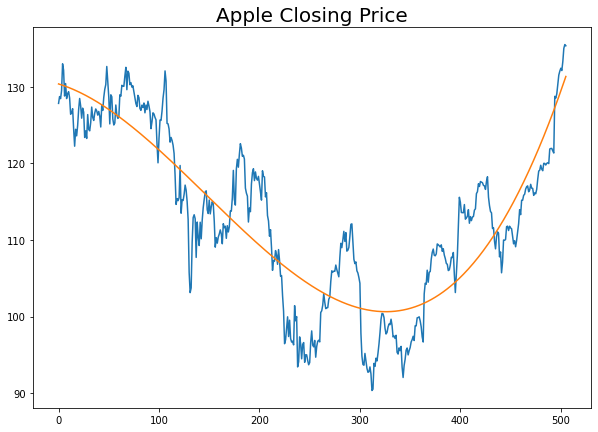

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,7))
plt.plot(a)
plt.plot(cubic_fit)
plt.title('Apple Closing Price', size=20)
plt.show()

Roots of polynomial

In [8]:
# roots
np.roots(poly)

array([ 404.2914357 +320.02549613j,  404.2914357 -320.02549613j,
       -366.03133091  +0.j        ])

**Constructing Polynomials and Derivatives**

In [9]:
func = np.poly1d(np.array([1, 2, 3, 4]).astype(float))

<center> func = 1x<sup>3</sup> + 2x<sup>2</sup> + 3x<sup>1</sup> + 4 </center>
<br> 
<strong>1st derivative </strong>

In [10]:
func_der = func.deriv(m=1)
func_der

poly1d([3., 4., 3.])

**Y values based on function and derivative**

In [11]:
x = np.linspace(-10, 10, 30)
y = func(x)
y1 = func_der(x)

**Plot**

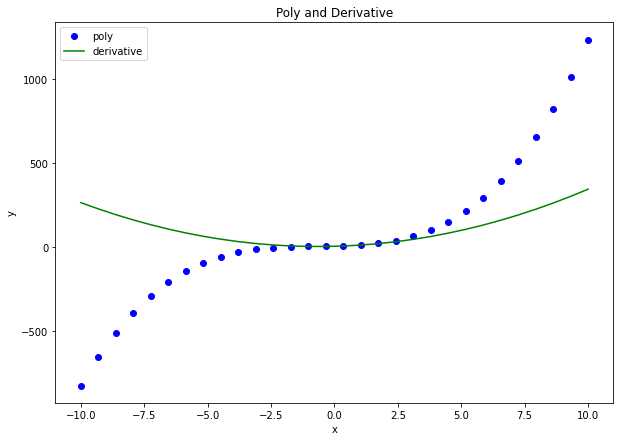

In [12]:
# plot
plt.figure(figsize=(10, 7))
plt.plot(x, y, 'bo', label='poly')
plt.plot(x, y1, 'g-', label='derivative')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Poly and Derivative')
plt.legend()
plt.show()

**Practice Challenge** <br>
Impute the missing data  in the following series data by fitting a 4th degree polynomial. <br> <br>
 import numpy as np <br>
 arr = np.genfromtxt('Datasets/stock_price_miss.csv', delimiter='csv', skip_header = 1).round(2) <br>
 arr <br>

 Actua data is in: `'Datasets/stock_price.csv'`

In [13]:
# solution
import numpy as np
arr = np.genfromtxt('Datasets/stock_price_miss.csv', delimiter='csv', skip_header = 1).round(2)
arr[:10]

array([127.83, 128.72, 128.45, 129.5 , 133.  ,    nan, 128.79, 130.42,
       128.46, 129.09])

In [14]:
# x values
t = np.arange(len(arr))

data =np.c_[t, arr]
data[:10]

array([[  0.  , 127.83],
       [  1.  , 128.72],
       [  2.  , 128.45],
       [  3.  , 129.5 ],
       [  4.  , 133.  ],
       [  5.  ,    nan],
       [  6.  , 128.79],
       [  7.  , 130.42],
       [  8.  , 128.46],
       [  9.  , 129.09]])

**Series and missing data**

In [15]:
ser = data[~np.isnan(data[:, 1]), 1]
ind_ser = data[~np.isnan(data[:, 1]), 0]
ind_miss = data[np.isnan(data[:, 1]), 0]

print(ser[:10])
print(ind_ser[:10])
print(ind_miss)

[127.83 128.72 128.45 129.5  133.   128.79 130.42 128.46 129.09 129.36]
[ 0.  1.  2.  3.  4.  6.  7.  8.  9. 10.]
[ 5. 20. 33. 47.]


**Fit**

In [16]:
# fitting a 4th degree polynomial.
poly = np.polyfit(ind_ser, ser, 4)

# coeffs.
print("Polynomial fit \n", poly)

Polynomial fit 
 [-4.59159359e-09  5.98659968e-06 -2.10575276e-03  1.30313912e-01
  1.25996837e+02]


**Predict**

In [17]:
fit_miss = np.polyval(poly, ind_miss)
fit_miss

array([126.59650855, 127.80797264, 128.21372687, 128.06912462])

**Compare with actual data**

In [18]:
actual = np.genfromtxt('Datasets/stock_price.csv', delimiter='csv', skip_header = 1).round(2)
actual[ind_miss.astype('int')]

array([132.17, 127.04, 127.35, 130.28])